## Importing relevant libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [2]:
raw_data = pd.read_csv('teacher_salaries.csv')

In [3]:
raw_data.head()

,State,Region,Pay,Spend
0,Maine,NE,19.6,3.35
1,Vermont,NE,20.3,3.55
2,Rhode Island,NE,29.5,4.67
3,New York,MA,30.7,5.71
4,Pennsylvania,MA,25.9,4.17


### Creating dummy variables for Region (categorical data)

In [4]:
data = raw_data.copy()
data_clean = data.reset_index(drop=True)
data_clean = data.drop(['State'],axis=1)
data_dummies = pd.get_dummies(data_clean,drop_first=True)
data_dummies.columns.values

array(['Pay', 'Spend', 'Region_ESC', 'Region_MA', 'Region_MN',
       'Region_NE', 'Region_PA', 'Region_SA', 'Region_WNC', 'Region_WSC'],
      dtype=object)

In [5]:
cols = ['Pay', 'Spend', 'Region_ESC', 'Region_MA', 'Region_MN',
       'Region_NE', 'Region_PA', 'Region_SA', 'Region_WNC', 'Region_WSC']
data_preprocessed = data_dummies[cols]
data_preprocessed

,Pay,Spend,Region_ESC,Region_MA,Region_MN,Region_NE,Region_PA,Region_SA,Region_WNC,Region_WSC
0,19.6,3.35,0,0,0,1,0,0,0,0
1,20.3,3.55,0,0,0,1,0,0,0,0
2,29.5,4.67,0,0,0,1,0,0,0,0
3,30.7,5.71,0,1,0,0,0,0,0,0
4,25.9,4.17,0,1,0,0,0,0,0,0
5,24.3,3.16,0,0,0,0,0,0,0,0
6,30.2,3.78,0,0,0,0,0,0,0,0
7,27.4,3.98,0,0,0,0,0,0,1,0
8,22.0,3.16,0,0,0,0,0,0,1,0
9,18.1,2.97,0,0,0,0,0,0,1,0


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_preprocessed.drop(['Pay'],axis=1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,7.304505,Spend
1,1.263409,Region_ESC
2,1.769134,Region_MA
3,1.910679,Region_MN
4,1.947966,Region_NE
5,2.077296,Region_PA
6,2.195640,Region_SA
7,1.794520,Region_WNC
8,1.345862,Region_WSC


All VIF values are below 10 so no multicollinearity is observed.

In [12]:
x = data[['Region','Spend']]
y = data['Pay']
log_pay = np.log(y)

## Data Visualization

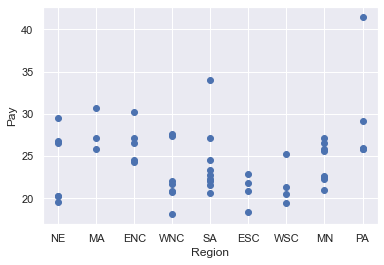

In [14]:
data['log pay'] = log_pay
plt.scatter(data['Region'],y)
plt.xlabel('Region')
plt.ylabel('Pay')
plt.show()

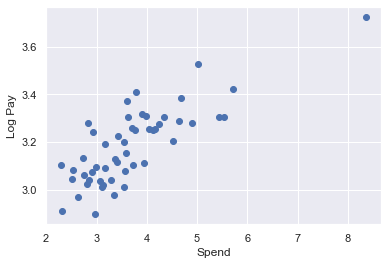

In [15]:
plt.scatter(data['Spend'],log_pay)
plt.xlabel('Spend')
plt.ylabel('Log Pay')
plt.show()

## Feature Scaling Independent Variables

In [22]:
data_p2=data_preprocessed.drop(['Pay'],axis=1)
data_p2['log_pay'] = log_pay
targets = data_p2['log_pay']
inputs = data_p2.drop(['log_pay'],axis=1)

In [23]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

## Regression

In [25]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=42)

In [26]:
#Regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_hat = reg.predict(x_train)

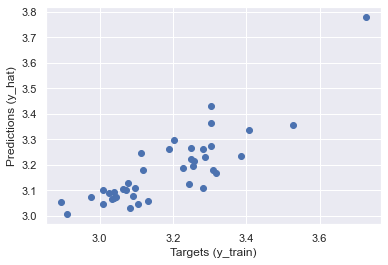

In [28]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.show()

In [29]:
reg.score(x_train,y_train)

0.7343802720781796

In [30]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Spend,0.127226
1,Region_ESC,-0.041004
2,Region_MA,-0.044500
3,Region_MN,-0.040188
4,Region_NE,-0.067519
5,Region_PA,-0.033560
6,Region_SA,-0.050009
7,Region_WNC,-0.063128
8,Region_WSC,-0.028971


## Testing

In [32]:
y_hat_test = reg.predict(x_test)

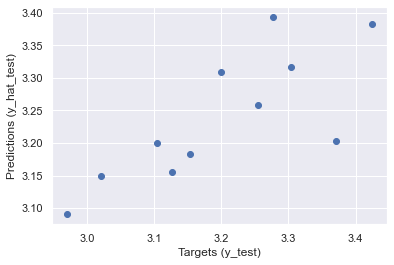

In [35]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.show()

In [37]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_performance.head()

,Predictions
0,23.307413
1,24.523830
2,25.999548
3,24.109193
4,24.614959


In [44]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    3.020425
1    3.104587
2    3.254243
3    3.152736
4    3.370738
Name: log_pay, dtype: float64

In [45]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Predictions,Target
0,23.307413,20.5
1,24.523830,22.3
2,25.999548,25.9
3,24.109193,23.4
4,24.614959,29.1
5,27.589334,27.2
6,21.983830,19.5
7,29.789728,26.5
8,29.455172,30.7
9,27.355106,24.5


In [48]:
df_performance['Residual'] = df_performance['Target']-df_performance['Predictions']
df_performance

,Predictions,Target,Residual
0,23.307413,20.5,-2.807413
1,24.523830,22.3,-2.223830
2,25.999548,25.9,-0.099548
3,24.109193,23.4,-0.709193
4,24.614959,29.1,4.485041
5,27.589334,27.2,-0.389334
6,21.983830,19.5,-2.483830
7,29.789728,26.5,-3.289728
8,29.455172,30.7,1.244828
9,27.355106,24.5,-2.855106


In [49]:
df_performance['Difference%'] = np.absolute(df_performance['Residual']/df_performance['Target']*100)
df_performance

,Predictions,Target,Residual,Difference%
0,23.307413,20.5,-2.807413,13.694699
1,24.523830,22.3,-2.223830,9.972332
2,25.999548,25.9,-0.099548,0.384355
3,24.109193,23.4,-0.709193,3.030738
4,24.614959,29.1,4.485041,15.412512
5,27.589334,27.2,-0.389334,1.431373
6,21.983830,19.5,-2.483830,12.737588
7,29.789728,26.5,-3.289728,12.414068
8,29.455172,30.7,1.244828,4.054814
9,27.355106,24.5,-2.855106,11.653492


In [50]:
df_performance.describe()

,Predictions,Target,Residual,Difference%
count,11.000000,11.000000,11.000000,11.000000
mean,25.654532,24.763636,-0.890895,7.975654
std,2.584454,3.493214,2.280802,5.598919
min,21.983830,19.500000,-3.289728,0.384355
25%,23.790465,22.550000,-2.645621,2.988479
50%,24.614959,24.500000,-0.709193,9.972332
75%,27.472220,26.850000,-0.244441,12.575828
max,29.789728,30.700000,4.485041,15.412512


In [52]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f'%x) #displays all data
df_performance.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
2,26.00,25.90,-0.10,0.38
5,27.59,27.20,-0.39,1.43
10,23.47,22.80,-0.67,2.95
3,24.11,23.40,-0.71,3.03
8,29.46,30.70,1.24,4.05
1,24.52,22.30,-2.22,9.97
9,27.36,24.50,-2.86,11.65
7,29.79,26.50,-3.29,12.41
6,21.98,19.50,-2.48,12.74
0,23.31,20.50,-2.81,13.69


## Conclusions
#### The model yielded a minimum residual error of 0.38% and a maximum residual error of 15.41%. The model's mean difference is approximately 8% which is fairly low. On average this model can predict the teacher's pay depending on spend and region relatively well considering that only 2 variables was used. There are definitely ways in which this model can be improved.

## Improving the model
1. Include different variables
2. Remove outliers
3. Use different kinds of transformations